In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import random

In [2]:
np.random.seed(42)
n_cities  = 32
points = np.random.rand(n_cities, 2) * 100

In [3]:
def distance_matrix(indices):
    selected_points = points[indices]
    return squareform(pdist(selected_points, 'euclidean'))

In [4]:
def route_length(permutation, distance_matrix):
    length = 0
    for i in range(len(permutation)):
        length += distance_matrix[permutation[i-1], permutation[i]]
    return length

def generate_neighborhood(permutation):
    a, b = random.sample(range(len(permutation)), 2)
    new_permutation = permutation[:]
    new_permutation[a], new_permutation[b] = new_permutation[b], new_permutation[a]
    return new_permutation

def random_solution():
    permutation = list(range(n_cities))
    random.shuffle(permutation)
    return permutation

random_permutation = random_solution()
neighborhood = generate_neighborhood(random_permutation)
length = route_length(random_permutation, distance_matrix(random_permutation))

print(f'Random permutation: \t{random_permutation}')
print(f'Neighborhood: \t\t{neighborhood}')
print(f'Route length: \t\t{length}')

Random permutation: 	[30, 13, 6, 26, 16, 7, 8, 12, 25, 10, 11, 24, 28, 29, 18, 31, 14, 5, 1, 27, 15, 9, 4, 23, 22, 21, 20, 3, 17, 2, 19, 0]
Neighborhood: 		[30, 13, 6, 1, 16, 7, 8, 12, 25, 10, 11, 24, 28, 29, 18, 31, 14, 5, 26, 27, 15, 9, 4, 23, 22, 21, 20, 3, 17, 2, 19, 0]
Route length: 		1933.3272341916602


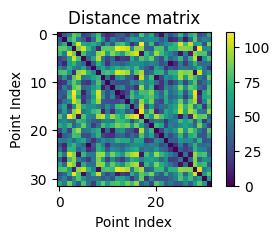

In [5]:
distance_matrix  = distance_matrix(random_permutation)

plt.figure(figsize=(4, 2))
plt.imshow(distance_matrix)
plt.colorbar()
plt.title('Distance matrix')
plt.xlabel('Point Index')
plt.ylabel('Point Index')
plt.show()